This first bloco of code is responsável by cairregair the nossa image médica of example (a fatia of ressonância magnética of the cérebro) and prepairá-la in the formatos float (values between 0 and 1) and ubyte (values between 0 and 255). These vairiáveis (image_float, image_ubyte) will be usadas in the examples subsequentes of the chapter 4.

In [ ]:
!pip install numpy scikit-image matplotlib pydicom requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.7 MB/s eta 0:00:00


Volume 'brain' carregado. Usando a fatia 5.


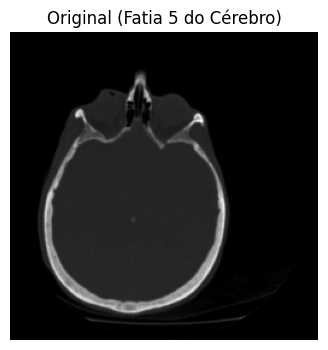

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, util
from skimage.color import rgb2gray
from scipy import ndimage, fftpack # Fftpack for some operations of FFT if necessaryimport cv2 # OpenCV can to be useful for padding or others functionsimport time # For medir tempo of execution
# Tentar carregar a imagem 'brain'try:
    brain_volume = data.brain()
    if brain_volume.ndim == 3:
        slice_index = brain_volume.shape[0] // 2
        image_gray_orig = brain_volume[slice_index, :, :]
        print(f"Volume 'brain' carregado. Usando a fatia {slice_index}.")
    elif brain_volume.ndim == 2:
        image_gray_orig = brain_volume
        slice_index = "N/A (Imagem 2D)"
        print(f"Imagem 'brain' (2D) carregada.")
    else:
        raise ValueError(f"Formato inesperado para 'brain': {brain_volume.shape}")

    if image_gray_orig.ndim != 2:
         raise ValueError("A fatia selecionada não é uma imagem 2D.")

    image_float = img_as_float(image_gray_orig.copy())
    image_ubyte = img_as_ubyte(image_gray_orig.copy())

    plt.figure("Imagem Original para Cap. 4", figsize=(4,4))
    plt.imshow(image_ubyte, cmap='gray')
    plt.title(f"Original (Fatia {slice_index} do Cérebro)")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Erro ao carregar a imagem 'brain': {e}")
    print("Usando imagem 'camera' como fallback.")
    image_gray_orig = data.camera()
    image_float = img_as_float(image_gray_orig.copy())
    image_ubyte = img_as_ubyte(image_gray_orig.copy())
    plt.figure("Imagem Fallback para Cap. 4", figsize=(4,4))
    plt.imshow(image_ubyte, cmap='gray')
    plt.title("Fallback ('camera')")
    plt.axis('off')
    plt.show()

# dimensions of the image for uso posteriorM, N = image_float.shape

4.1 Background (Introdução): This seção is conceitual and discute why we use the domain of the frequency. The principal vantagem withputacional vem of the Transform Rápida of Fourier (FFT), that torna the convolution for filters lairge more eficiente in the domain of the frequency of the that in the domain espacial. Let us importair the libraries that we will use to the longo deste chapter.

In [ ]:
# Bibliotecas principais already importadas in the configuração inicial.# Reafirmando the more usadas for operations of Fourier:from numpy.fft import fft, ifft, fft2, ifft2, fftshift, ifftshift

print("Bibliotecas para o Capítulo 4 prontas.")

Bibliotecas para o Capítulo 4 prontas.


4.2 Conceitos Preliminares: Let us revisair some conceitos matemáticos essenciais. First, numbers withplexos, that are the base of the Transform of Fourier. After, demonstraremos the Transform of Fourier 1D of a function simples (a function caixa) and its spectrum. Finalmente, ilustraremos the Teorema of the Convolution in 1D, that afirma that the convolution in the domain of the tempo (or espacial) equivale à multiplicação in the domain of the frequency.

Número Complexo: (3+4j)
Magnitude: 5.00
Fase (radianos): 0.93, Fase (graus): 53.13



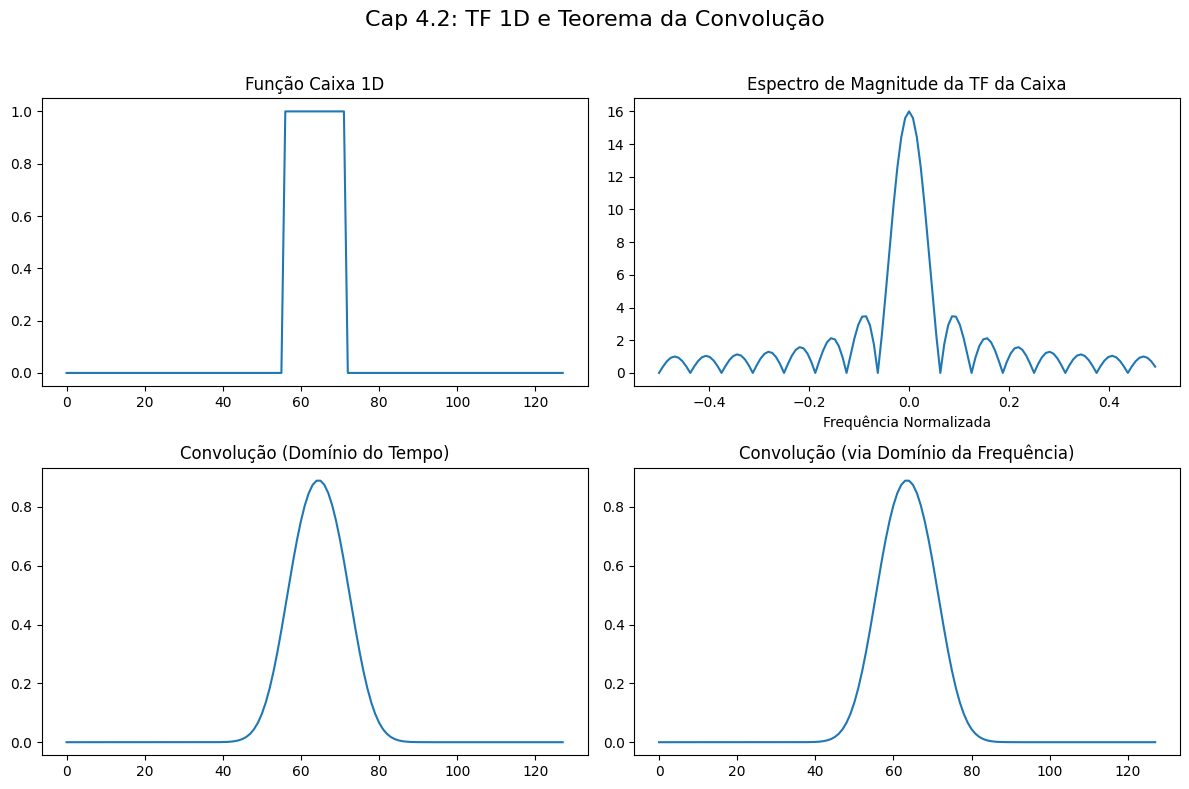

In [ ]:
# 4.2 Conceitos Preliminares
# The) Numbers Complexosnum_complexo = 3 + 4j
magnitude = np.abs(num_complexo)
fase_rad = np.angle(num_complexo)
fase_graus = np.degrees(fase_rad)
print(f"Número Complexo: {num_complexo}")
print(f"Magnitude: {magnitude:.2f}")
print(f"Fase (radianos): {fase_rad:.2f}, Fase (graus): {fase_graus:.2f}\n")

# B) TF 1D of a function caixa and its spectrum# To create a function caixa simplessignal_len = 128
box_width = 16
func_caixa = np.zeros(signal_len)
start_box = (signal_len - box_width) // 2
func_caixa[start_box : start_box + box_width] = 1

# Calcular a TF 1DF_caixa = fft(func_caixa)
F_caixa_shifted = fftshift(F_caixa) # Centralizar componente DCespectro_caixa = np.abs(F_caixa_shifted)
frequencias = fftshift(np.fft.fftfreq(signal_len)) # Axis of the frequencies centralizado
# C) Teorema of the Convolution 1D (Ilustração)# Criar outro sinal (ex: gaussiana)x_gauss = np.arange(-signal_len//2, signal_len//2)
sigma_gauss = 5
func_gaussiana = np.exp(-x_gauss**2 / (2*sigma_gauss**2))
func_gaussiana = func_gaussiana / np.sum(func_gaussiana) # Normalizar para ser um kernel
# Convolution in the domain of the tempo/espacialconv_tempo = np.convolve(func_caixa, func_gaussiana, mode='same')

# Convolution in the domain of the frequencyF_gaussiana = fft(fftshift(func_gaussiana)) # Shift para alinhar, depois FFTconv_freq_produto = F_caixa * F_gaussiana # Multiplicação in the domain of the frequencyconv_freq_resultado = ifft(conv_freq_produto).real # Transformada inversa
# Visualization 4.2fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0,0].plot(func_caixa); axs[0,0].set_title('Função Caixa 1D')
axs[0,1].plot(frequencias, espectro_caixa); axs[0,1].set_title('Espectro de Magnitude da TF da Caixa')
axs[0,1].set_xlabel('Frequência Normalizada')

axs[1,0].plot(conv_tempo); axs[1,0].set_title('Convolução (Domínio do Tempo)')
axs[1,1].plot(conv_freq_resultado); axs[1,1].set_title('Convolução (via Domínio da Frequência)')

plt.suptitle("Cap 4.2: TF 1D e Teorema da Convolução", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Function Caixa and its Spectrum:** * The first graph (axs[0,0]) shows the function caixa in the domain of the tempo/espacial – a pulso retangulair. * The second graph (axs[0,1]) shows the spectrum of magnitude of the its Transform of Fourier. Observe that ele if assemelha the a function sinc (sin(x)/x), that is the TF teórica of a function caixa. The larger energia is concentrada in the frequency zero (withponent DC, in the centro devido to the fftshift) and decai with oscillations for frequencies more altas. **Teorema of the Convolution:** * The third graph (axs[1,0]) shows the result of the convolution of the function caixa with a kernel Gaussiano, calculada diretamente in the domain of the tempo. The efeito is a "smoothing" or "borramento" of the function caixa. * The quairto graph (axs[1,1]) shows the result of the convolution obtida multiplicando the DFTs of the two signals and after applying the IDFT. Visualmente, this result should to be idêntico (or very next, devido the erros of precision numérica) to the result of the convolution in the domain of the tempo, ilustrando the Teorema of the Convolution.

4.3 Sampling and the TF of Functions Amostradas This seção aborda as the sampling of a signal continuous afeta its Transform of Fourier. The TF of a signal sampled consiste in cópias repetidas (réplicas) of the TF of the signal original. If the rate of sampling not for alta the suficiente (according to the Teorema of Nyquist, f_s2f_max), those réplicas if aboutpõem, causando a fenômeno chamado aliasing, where altas frequencies aparecem "disfairçadas" of baixas frequencies. Let us simulair that with a signal senoidal.

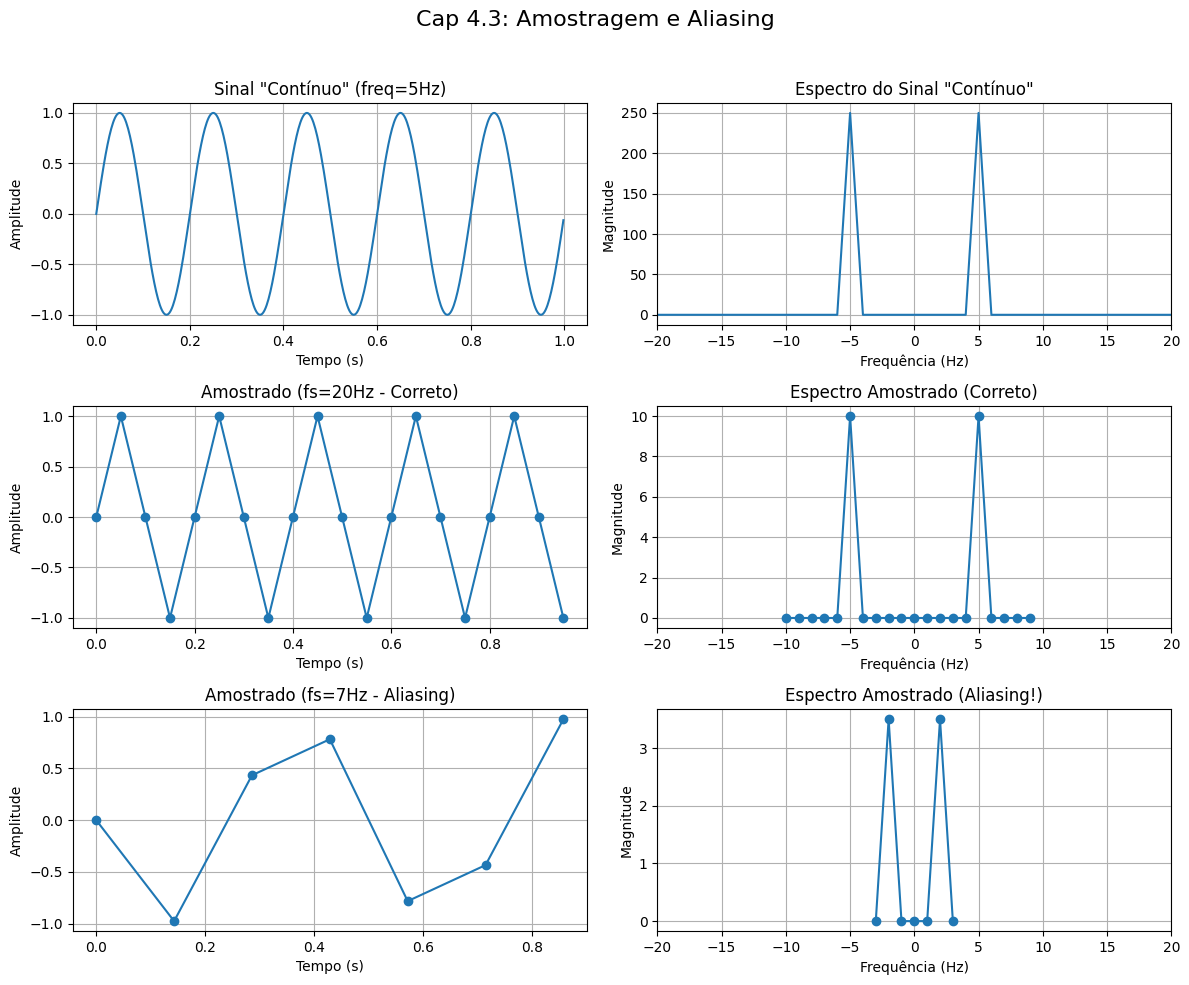

No caso com Aliasing (fs=7Hz para sinal de 5Hz), a frequência original aparece erroneamente como aproximadamente 2.00Hz no espectro base (o pico mais próximo da freq. zero).


In [ ]:
# 4.3 Amostragem e Aliasing
# Signal senoidal "continuous" original (simulado with alta rate of sampling)freq_original_sinal = 5  # Frequency in Hz of the signal originalduracao_sinal = 1.0 # segundosnum_pontos_continuo = 500 # Points for simular the signal continuousdelta_t_continuo = duracao_sinal / num_pontos_continuo
t_continuo_eixo = np.linspace(0, duracao_sinal, num_pontos_continuo, endpoint=False)
sinal_original_continuo = np.sin(2 * np.pi * freq_original_sinal * t_continuo_eixo)

# TF of the signal "continuous"F_sinal_continuo_shifted = fftshift(fft(sinal_original_continuo))
freqs_eixo_continuo_shifted = fftshift(np.fft.fftfreq(num_pontos_continuo, d=delta_t_continuo))

# a) Amostragem Correta (Taxa de Nyquist: fs > 2*freq_original_sinal = 10 Hz)fs_correta = 20 # Hz (taxa de amostragem)num_amostras_correta = int(fs_correta * duracao_sinal)
delta_t_correta = 1/fs_correta
t_amostrado_correto_eixo = np.linspace(0, duracao_sinal, num_amostras_correta, endpoint=False)
sinal_amostrado_correto = np.sin(2 * np.pi * freq_original_sinal * t_amostrado_correto_eixo)

# TF do sinal amostrado corretamenteF_amostrado_correto_shifted = fftshift(fft(sinal_amostrado_correto))
freqs_eixo_amostrado_correto_shifted = fftshift(np.fft.fftfreq(num_amostras_correta, d=delta_t_correta))

# b) Subamostragem (Causando Aliasing) (fs < 2*freq_original_sinal = 10 Hz)fs_subamostrada = 7 # Hz (taxa de amostragem) - Abaixo de Nyquistnum_amostras_sub = int(fs_subamostrada * duracao_sinal)
delta_t_sub = 1/fs_subamostrada
t_amostrado_sub_eixo = np.linspace(0, duracao_sinal, num_amostras_sub, endpoint=False)
sinal_amostrado_sub = np.sin(2 * np.pi * freq_original_sinal * t_amostrado_sub_eixo)

# TF do sinal subamostradoF_amostrado_sub_shifted = fftshift(fft(sinal_amostrado_sub))
freqs_eixo_amostrado_sub_shifted = fftshift(np.fft.fftfreq(num_amostras_sub, d=delta_t_sub))

# Visualization 4.3fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs[0,0].plot(t_continuo_eixo, sinal_original_continuo); axs[0,0].set_title(f'Sinal "Contínuo" (freq={freq_original_sinal}Hz)')
axs[0,1].plot(freqs_eixo_continuo_shifted, np.abs(F_sinal_continuo_shifted)); axs[0,1].set_title('Espectro do Sinal "Contínuo"')
axs[0,1].set_xlim([-fs_correta, fs_correta]) # Limitar axis x for better visualization of the réplicas
axs[1,0].plot(t_amostrado_correto_eixo, sinal_amostrado_correto, 'o-'); axs[1,0].set_title(f'Amostrado (fs={fs_correta}Hz - Correto)')
axs[1,1].plot(freqs_eixo_amostrado_correto_shifted, np.abs(F_amostrado_correto_shifted), 'o-'); axs[1,1].set_title('Espectro Amostrado (Correto)')
axs[1,1].set_xlim([-fs_correta, fs_correta]) # Same escala of frequency
axs[2,0].plot(t_amostrado_sub_eixo, sinal_amostrado_sub, 'o-'); axs[2,0].set_title(f'Amostrado (fs={fs_subamostrada}Hz - Aliasing)')
axs[2,1].plot(freqs_eixo_amostrado_sub_shifted, np.abs(F_amostrado_sub_shifted), 'o-'); axs[2,1].set_title('Espectro Amostrado (Aliasing!)')
axs[2,1].set_xlim([-fs_correta, fs_correta]) # Same escala of frequency for comparison
for ax_row in axs:
    for ax_col in ax_row:
        ax_col.set_xlabel("Tempo (s)" if ax_col.get_subplotspec().colspan.start == 0 else "Frequência (Hz)")
        ax_col.set_ylabel("Amplitude" if ax_col.get_subplotspec().colspan.start == 0 else "Magnitude")
        ax_col.grid(True)

plt.suptitle("Cap 4.3: Amostragem e Aliasing", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

freq_alias = np.abs(freq_original_sinal - round(freq_original_sinal/fs_subamostrada) * fs_subamostrada)
print(f"No caso com Aliasing (fs={fs_subamostrada}Hz para sinal de {freq_original_sinal}Hz), a frequência original aparece "
      f"erroneamente como aproximadamente {freq_alias:.2f}Hz no espectro base (o pico mais próximo da freq. zero).")

Line 1 (Signal "Continuous"): * axs[0,0]: Shows the signal senoidal original of 5 Hz as if fosse continuous (sampled with alta frequency). * axs[0,1]: Shows the spectrum of magnitude deste signal. Observe the two picos sharp in pm5 Hz, representing the single frequency presente. The restante of the spectrum is next of zero.

Line 2 (Sampling Correta, f_s=20 Hz): * axs[1,0]: Shows the signal after to be sampled at 20 Hz. The points represent the samples. * axs[1,1]: Shows the spectrum of the signal sampled. Continuamos seeing the picos principais in pm5 Hz. Furthermore, now we see réplicas desses picos centradas in multiple of the rate of sampling f_s=20 Hz (in other words, in 20 pm5 Hz, −20 pm5 Hz, etc.). As f_s2f_max, those réplicas are bem sepairadas of the spectrum base in torno of 0 Hz.

Line 3 (Subsampling, f_s=7 Hz - Aliasing): * axs[2,0]: Shows the signal sampled at 7 Hz. Visualmente, already parece to have a frequency different of the original. * axs[2,1]: Shows the spectrum of the signal subamostrado. Now, the picos principais not are in pm5 Hz. Devido to the aliasing (overlap of the réplicas of the spectrum), the frequency of 5 Hz is "disfairçada" as a frequency more baixa. In this case, with f_s=7 Hz, the frequency of 5 Hz aparecerá as ∣5−7∣=2 Hz. Thus, você verá picos proeminentes in pm2 Hz. That demonstra the problem of the aliasing: the information of the frequency original was perdida and interpretada incorretamente.

4.4 The Transform Discrete of Fourier (DFT) of A Vairiable The DFT is the versão of the Transform of Fourier that we use for signals amostrados (discrete and finitos). Ela transforma a sequence of M samples in the domain of the tempo/espacial in M coefficients withplexos in the domain of the frequency. Mostraremos as to calculate the DFT and its inversa (IDFT) and visualizair the spectrum of magnitude and phase using the function caixa of the example previous.

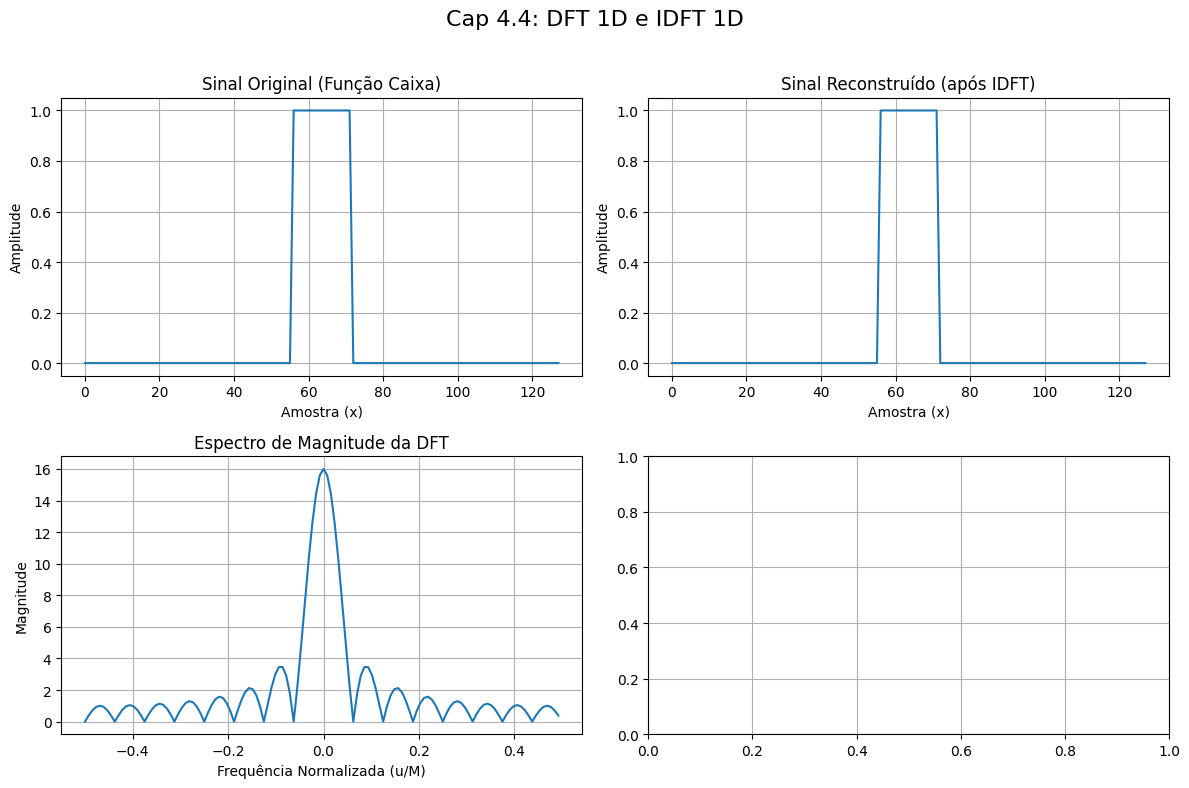

In [ ]:
# 4.4 DFT of A Variable
# Usaremos the signal of the function caixa defined anteriormente in 4.2# func_caixa (128 amostras)
# Calcular a DFT 1DF_dft_1D = fft(func_caixa)

# Calcular a IDFT 1D para reconstruir o sinal originalsinal_reconstruido_idft_1D = ifft(F_dft_1D)

# For visualization of the spectrum, centralizamos the component DC (frequency zero)F_dft_1D_shifted = fftshift(F_dft_1D)
espectro_magnitude_dft_1D = np.abs(F_dft_1D_shifted)
espectro_fase_dft_1D = np.angle(F_dft_1D_shifted) # Fase em radianos
# To generate the axis of frequencies for the spectrum centralizadofrequencias_eixo_dft_1D = fftshift(np.fft.fftfreq(func_caixa.size))

# Visualization 4.4fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0,0].plot(func_caixa); axs[0,0].set_title('Sinal Original (Função Caixa)')
axs[0,0].set_xlabel('Amostra (x)'); axs[0,0].set_ylabel('Amplitude')

# The IDFT can retornar numbers complexos with small part imaginária devido the erros numéricos.# Pegamos a parte real.axs[0,1].plot(sinal_reconstruido_idft_1D.real); axs[0,1].set_title('Sinal Reconstruído (após IDFT)')
axs[0,1].set_xlabel('Amostra (x)'); axs[0,1].set_ylabel('Amplitude')

axs[1,0].plot(frequencias_eixo_dft_1D, espectro_magnitude_dft_1D)
axs[1,0].set_title('Espectro de Magnitude da DFT')
axs[1,0].set_xlabel('Frequência Normalizada (u/M)'); axs[1,0].set_ylabel('Magnitude')



for ax_row in axs:
    for ax_col in ax_row:
        ax_col.grid(True)

plt.suptitle("Cap 4.4: DFT 1D e IDFT 1D", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Signal Original and Reconstruído (axs[0,0], axs[0,1]): * The first graph shows the function caixa 1D of input. * The second graph shows the signal reconstruído after to apply the DFT and after the IDFT. Idealmente, ele should to be idêntico to the original. Small differences can ocorrer devido à precision numérica finita of the withputador. The plotagem of the pairt. Real is feita because, teoricamente, the result of the IDFT of a signal real transformado should to be real, but withputacionalmente can sobrair minúsculas withponents imaginárias.

Spectrum of Phase (axs[1,1]): * Shows the angle of phase of each coefficient of the DFT. For the function caixa (that is real and pair if centrada in the origem of the signal, or here, simétrica in torno of the its centro), the phase deveria to be predominantemente 0 or +-π (180 graus). The transições abruptas in the phase (saltos between 0 and π, or − π and π) ocorrem in the zeros of the function sinc of the spectrum of magnitude. The interpretação of the phase can to be withplexa, but ela contains information cruciais about the position and simetria of the signal.

4.5 Extensões for Functions of Duas Vairiáveis (DFT 2D) Now estendemos the conceito of the DFT for images 2D. The DFT 2D transforma a image M x N in the domain espacial in a matrix M x N of coefficients withplexos in the domain of the frequency. Let us to apply the DFT 2D à nossa image médica (image_float) and visualizair its spectrum of magnitude. The function fftshift is crucial for centralizair the withponent of frequency zero (DC) for better visualization of the spectrum. Also reconstruwe will the image using the IDFT 2D.

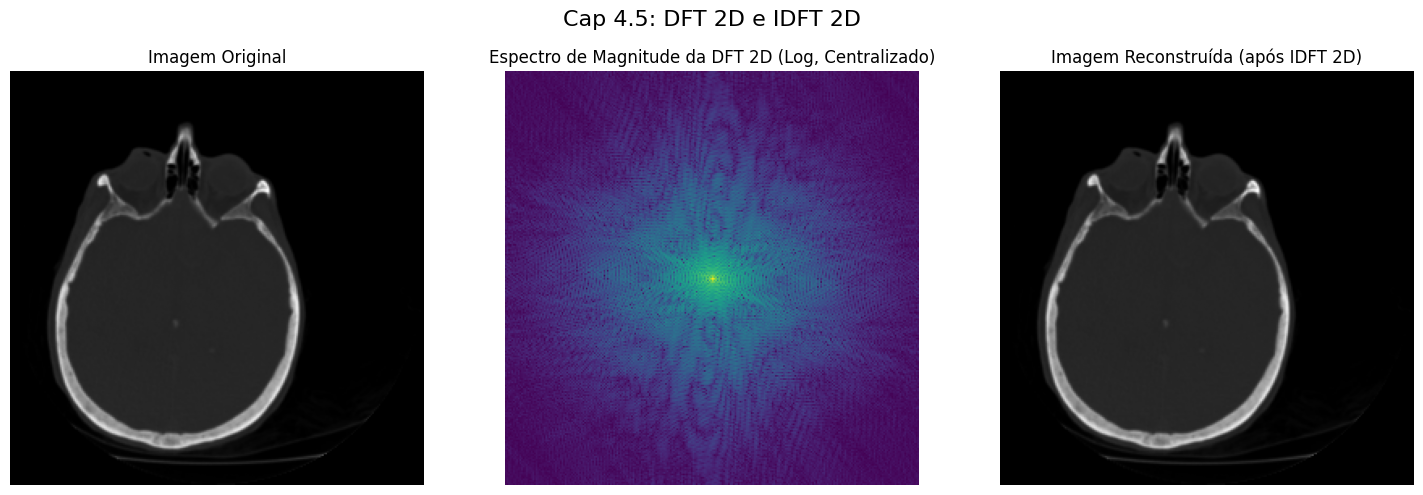

In [ ]:
# 4.5 DFT 2D
# Usaremos image_float (image médica carregada previamente)
# Calcular a DFT 2D da imagem# The function fft2 of the numpy retorna the DFT with F(0,0) (component DC) in the canto (0,0)F_imagem_dft2d = fft2(image_float)

# For visualization and filtragem, geralmente centralizamos the component DC.# Fftshift move the frequency zero for the centro of the spectrum.F_imagem_dft2d_shifted = fftshift(F_imagem_dft2d)

# Calcular o espectro de magnitude.# The magnitudes can variar very, then aplicamos log(1 + |F|) for better visualization.espectro_magnitude_imagem_dft2d = np.log1p(np.abs(F_imagem_dft2d_shifted)) # log1p(x) = log(1+x)
# Calcular a IDFT 2D para reconstruir a imagem original a partir da DFT# The ifft2 espera the DFT in the ordem not-shiftada (DC in the canto)imagem_reconstruida_idft2d = ifft2(F_imagem_dft2d).real #. Real for remover resíduos imaginários
# Visualization 4.5fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_float, cmap='gray'); axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(espectro_magnitude_imagem_dft2d, cmap='viridis') # 'viridis' is a bom colormap for espectrosaxs[1].set_title('Espectro de Magnitude da DFT 2D (Log, Centralizado)')
axs[1].axis('off')

axs[2].imshow(imagem_reconstruida_idft2d, cmap='gray'); axs[2].set_title('Imagem Reconstruída (após IDFT 2D)')
axs[2].axis('off')

plt.suptitle("Cap 4.5: DFT 2D e IDFT 2D", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Spectrum of Magnitude of the DFT 2D (axs[1]): * This is the "coração" of the domain of the frequency. The centro of the image (after fftshift) represents the frequency zero (withponent DC), that corresponde à intensidade average of the image. * À medida that in the afastamos of the centro, representamos frequencies espaciais more altas. * Points brilhantes fair of the centro indicate the presença forte of withponents of alta frequency (edges, texturas finas, noise). * The simetria regairding to the centro is esperada for images reais. * The escala logairítmica (np.Log1p) is crucial here for visualizair the withponents of alta frequency, that of other form seriam very escuras in withpairison with the withponent DC. * For the image of the cérebro, você provavelmente verá muita energia concentrada neair of the centro (baixas frequencies, representing the áreas larger and more suaves) and alguma energia if espalhando for frequencies more altas (representing the edges of the estruturas cerebrais and detalhes).

Image Reconstruída (axs[2]): * This image is the result of to apply the Transform of Fourier Inversa (ifft2) to the coefficients of the DFT. * Idealmente, ela should to be idêntica à image original. That demonstra that the pair DFT/IDFT is a transformação reversível (with small perdas devido à precision numérica). If the image reconstruída if parece with the original, that valida that the processo of transformação for the domain of the frequency and of volta for the espacial was done corretamente.

4.6 Some Propriedades of the DFT 2D The DFT 2D possui several propriedades importantes. Let us demonstrair: * centralization of the Spectrum by Pré-multiplicação: Embora fftshift seja withum, multiplicair the image by (−1)^(x+y) before of to calculate the DFT also resulta in a spectrum centralizado. * Teorema of the Convolution 2D: Demonstraremos that the convolution in the domain espacial is equivalente à multiplicação elemento the elemento in the domain of the frequency. Is crucial to use padding (preenchimento with zeros) in the images and in the kernel before of the DFTs for that the convolution circulair implícita in the DFT corresponda à convolution lineair desejada, evitando the wrapairound error.

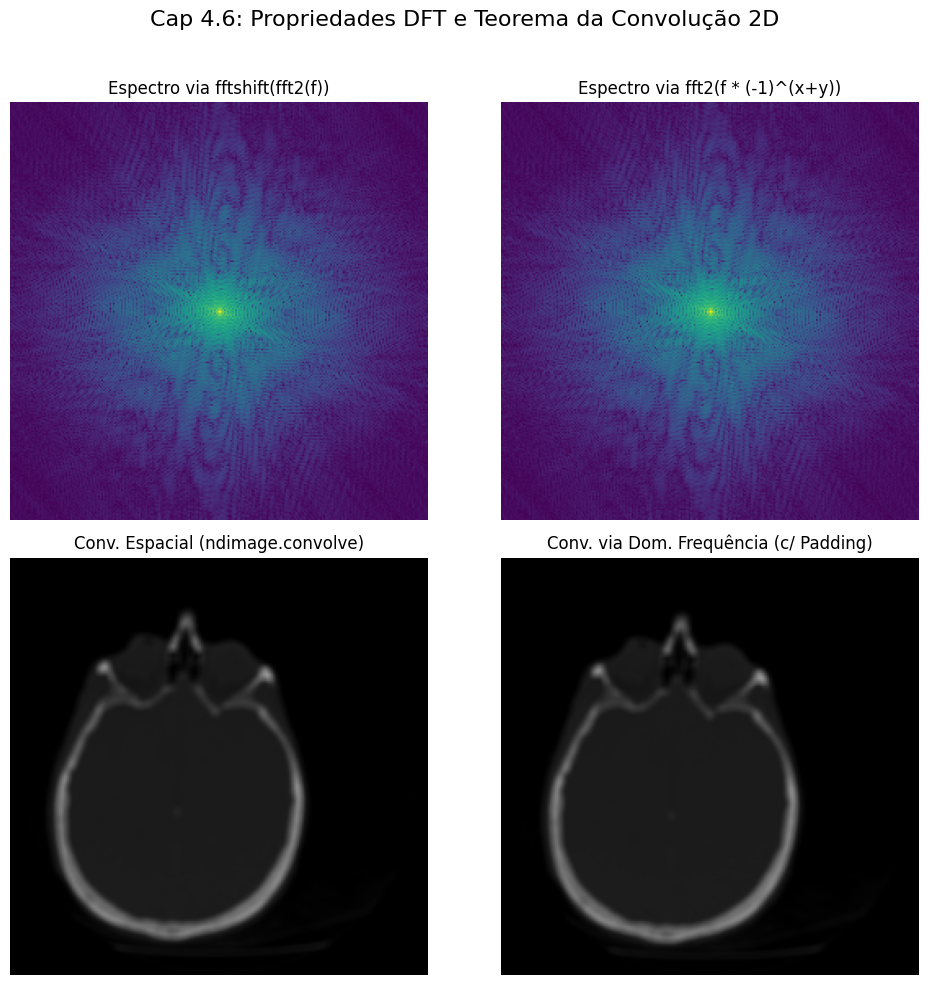

In [ ]:
# 4.6 Propriedades da DFT 2D
# The) centralization of the Spectrum multiplicando the image by (-1)^(x+y) before of the DFT# To create the pattern (-1)^(x+y)idx_x = np.arange(M).reshape(-1, 1) # Vector coluna of índices x (0 the M-1)idx_y = np.arange(N).reshape(1, -1) # Vector line of índices y (0 the N-1)checkerboard_pattern = (-1)**(idx_x + idx_y) # Creates the pattern of tabuleiro of xadrez
img_para_dft_centralizada = image_float * checkerboard_pattern
F_img_dft_ja_centralizada = fft2(img_para_dft_centralizada) # The DFT already sairá with DC in the centro of the matrix of outputespectro_mag_dft_ja_centralizada = np.log1p(np.abs(F_img_dft_ja_centralizada))

# B) Simetria Conjugada: |F(u, v)| = |F(-u,-v)|. Visível in the spectrum centralizado.
# C) Teorema of the Convolution 2D and the importância of the Padding# To define a kernel small (ex: filter of média 5x5)kernel_conv_media = np.ones((5,5)) / 25.0
m_k, n_k = kernel_conv_media.shape # dimensions of the kernel: m_k lines, n_k colunas
# Convolution espacial direta for referência (using scipy. Ndimage)img_resultado_conv_espacial = ndimage.convolve(image_float, kernel_conv_media, mode='reflect')

# Now, convolution via domain of the frequency:# 1. Padding da imagem e do kernel para evitar wraparound error.# Tamanho of the padding for convolution linear completa: P = M+m_k-1, Q = N+n_k-1P_pad_conv = M + m_k - 1
Q_pad_conv = N + n_k - 1

# Padde a imagem com zerosimg_padded_conv = np.pad(image_float,
                         (((P_pad_conv-M)//2, P_pad_conv-M-((P_pad_conv-M)//2)), # Topo, Baixo                          ((Q_pad_conv-N)//2, Q_pad_conv-N-((Q_pad_conv-N)//2))),# Esquerda, Direita                         mode='constant', constant_values=0)

# Padde o kernel e posicione sua origem (ex: centro) no canto (0,0) do array paddeado.# For convolution, the kernel h(-x,-y) is used. If the kernel is simétrico, h(-x,-y)=h(x, y).# If the kernel not is simétrico, ele should to be rotacionado/invertido.# The form more simples of implementar the convolution f*h via DFT is:# DFT(f) * DFT(h_com_origem_no_canto_e_padding)kernel_padded_para_dft = np.zeros((P_pad_conv, Q_pad_conv))
kernel_padded_para_dft[0:m_k, 0:n_k] = kernel_conv_media # Coloca o kernel no canto
# 2. Calcular as DFTs da imagem paddeada e do kernel paddeadoF_img_pad_conv = fft2(img_padded_conv)
F_kernel_pad_conv = fft2(kernel_padded_para_dft)

# 3. Multiplicar the DFTs in the domain of the frequencyG_conv_frequencia_prod = F_img_pad_conv * F_kernel_pad_conv

# 4. Calcular a IDFT do produtoimg_conv_frequencia_resultado_padded = ifft2(G_conv_frequencia_prod).real

# 5. Remover the padding: Extrair the region of tamanho M x N that corresponde# Ao result of the convolution linear with the even tamanho of the image original ('same' output).# The result of the convolution linear completa is (M+m_k-1) x (N+n_k-1).# For 'same', the result is M x N. The corte should to be done for alinhar the centros.# The canto (0,0) of the kernel sobrepõe the canto (0,0) of the image.# The output of the IDFT (img_conv_frequencia_resultado_padded) has the result of the convolution# linear completa. Para 'same', pegamos a parte que "cobre" a imagem original.# Os pixels de borda do kernel "saem" da imagem original.# The result useful começa in the pixel ((m_k-1)//2, (n_k-1)//2) of the image convoluída completa# And vai until ((m_k-1)//2 + M, (n_k-1)//2 + N).start_row_cut = (m_k - 1) // 2
end_row_cut = start_row_cut + M
start_col_cut = (n_k - 1) // 2
end_col_cut = start_col_cut + N
img_resultado_conv_frequencia = img_conv_frequencia_resultado_padded[start_row_cut:end_row_cut,
                                                                     start_col_cut:end_col_cut]
# Visualization 4.6fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Espectro da imagem original (calculado em 4.5)axs[0,0].imshow(espectro_magnitude_imagem_dft2d, cmap='viridis')
axs[0,0].set_title('Espectro via fftshift(fft2(f))'); axs[0,0].axis('off')

axs[0,1].imshow(espectro_mag_dft_ja_centralizada, cmap='viridis')
axs[0,1].set_title('Espectro via fft2(f * (-1)^(x+y))'); axs[0,1].axis('off')

axs[1,0].imshow(img_resultado_conv_espacial, cmap='gray', vmin=0, vmax=1)
axs[1,0].set_title('Conv. Espacial (ndimage.convolve)'); axs[1,0].axis('off')

axs[1,1].imshow(img_resultado_conv_frequencia, cmap='gray', vmin=0, vmax=1)
axs[1,1].set_title('Conv. via Dom. Frequência (c/ Padding)'); axs[1,1].axis('off')

plt.suptitle("Cap 4.6: Propriedades DFT e Teorema da Convolução 2D", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



centralization of the Spectrum (axs[0,0] vs. Axs[0,1]): * axs[0,0] (replotado of the ex. 4.5) shows the spectrum centralizado using fftshift(fft2(f)). * axs[0,1] shows the spectrum obtained calculating fft2(f * (-1)**(x+y)). Ambos the métodos should produzir espectros of magnitude visualmente idênticos, with the withponent DC (frequency zero) in the centro. That demonstra the duas maneiras of to obtain a spectrum centralizado.

Teorema of the Convolution 2D (axs[1,0] vs. Axs[1,1]): * axs[1,0] exibe the result of the convolution of the image original with the kernel of average, calculada diretamente in the domain espacial. This is the nosso result of referência. * axs[1,1] exibe the result of the convolution calculada in the domain of the frequency: 1. The image and the kernel were paddeados with zeros for a tamanho larger. 2. Their DFTs were calculadas. 3. The DFTs were multiplicadas elemento the elemento. 4. The IDFT of the produto was calculada. 5. The region correspondente to the tamanho of the image original was extraída of the result of the IDFT. * If the padding and the corte were feitos corretamente, axs[1,1] should to be visualmente (and numericamente, via np.Allclose) very similair the axs[1,0]. That ilustra that the convolution in the domain espacial is of fato equivalente à multiplicação in the domain of the frequency, since that the condições for the convolution lineair (via padding) sejam satisfeitas.

4.7 Fundamentos of the Filtragem in the Domain of the Frequency The filtragem in the domain of the frequency envolve multiplicair the DFT of the image by the function of transferência of the filter H(u, v). This bloco demonstra the passos withpletos for filtrair a image in the domain of the frequency, conforme descrito in the livro (Fig. 4.35). Usaremos a filter Gaussiano Passa-Baixas (GLPF) as example for H(u, v). The abordagem more withum and direta (using fftshift and ifftshift) will be usada here.

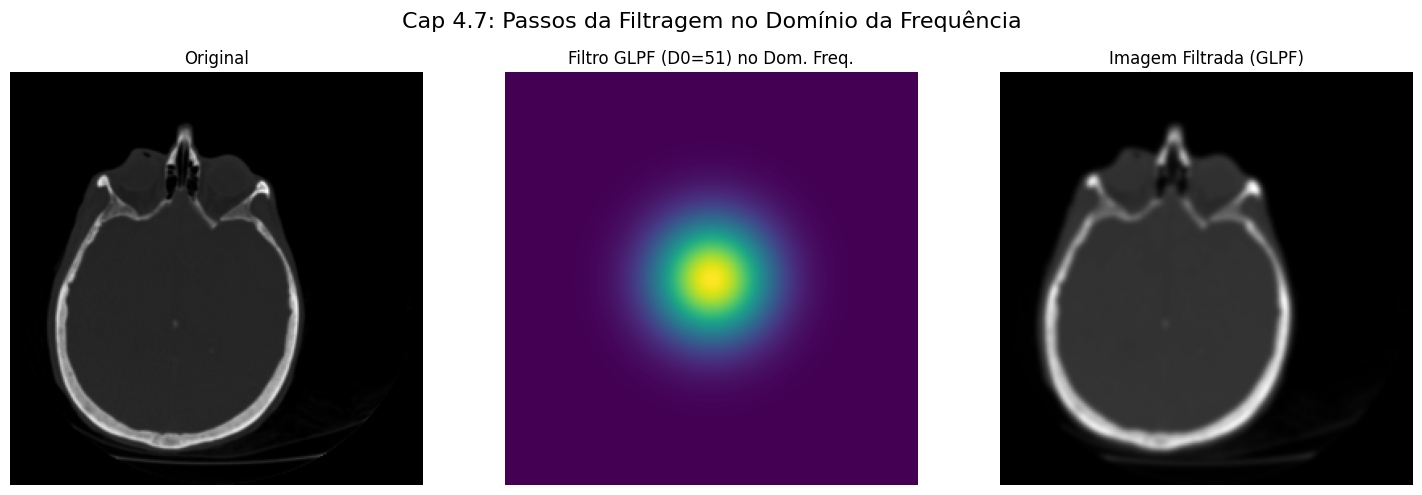

In [ ]:
# 4.7 Fundamentos of the Filtragem in the Domain of the Frequency (Abordagem Practice Comum)
# Imagem original: image_float (M x N)# Filtro a ser usado: Gaussiano Passa-Baixas H(u,v)
# 1. Padding da imagem de entrada f(x,y) para fp(x,y) de tamanho PxQP, Q = 2*M, 2*N # dimensions with paddingfp_para_filtragem = np.zeros((P,Q))
fp_para_filtragem[0:M, 0:N] = image_float

# 2. Calcular F(u,v) = fftshift(fft2(fp_para_filtragem))# fft2 calcula a DFT (DC no canto). fftshift centraliza o DC.F_uv_img_centralizada = fftshift(fft2(fp_para_filtragem))

# 3. To generate the function of transferência of the filter H(u, v) centralizada.# (Reutilizando U_mesh_filt, V_mesh_filt, D_sq_filt of 4.8, that are PxQ and centralizados)# Ou redefinindo aqui para clareza:u_idx_filt_4_7 = np.fft.fftshift(np.fft.fftfreq(P)) * P
v_idx_filt_4_7 = np.fft.fftshift(np.fft.fftfreq(Q)) * Q
V_mesh_filt_4_7, U_mesh_filt_4_7 = np.meshgrid(v_idx_filt_4_7, u_idx_filt_4_7)
D_sq_filt_4_7 = U_mesh_filt_4_7**2 + V_mesh_filt_4_7**2

D0_corte_lp_4_7 = P * 0.1 # Frequency of corte (ex: 10% of the dimension P)H_glpf_4_7 = np.exp(-D_sq_filt_4_7 / (2 * (D0_corte_lp_4_7 + 1e-6)**2)) # Filtro Gaussiano centralizado
# 4. Calcular o produto G(u,v) = H(u,v)F(u,v)G_uv_produto_centralizado = H_glpf_4_7 * F_uv_img_centralizada

# 5. Calcular a IDFT: g_pad(x,y) = Real{ IDFT[ifftshift(G(u,v))] }# Ifftshift desfaz the centralization of G before of the IDFT.img_filtrada_padded_4_7 = ifft2(ifftshift(G_uv_produto_centralizado)).real

# 6. Extrair the region MxN of the canto superior esquerdo of g_pad(x, y)img_filtrada_final_4_7 = img_filtrada_padded_4_7[0:M, 0:N]
img_filtrada_final_4_7 = exposure.rescale_intensity(img_filtrada_final_4_7, out_range=(0,1))


# Visualization 4.7fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_float, cmap='gray'); axs[0].set_title('Original'); axs[0].axis('off')
axs[1].imshow(H_glpf_4_7, cmap='viridis'); axs[1].set_title(f'Filtro GLPF (D0={D0_corte_lp_4_7:.0f}) no Dom. Freq.'); axs[1].axis('off')
axs[2].imshow(img_filtrada_final_4_7, cmap='gray'); axs[2].set_title('Imagem Filtrada (GLPF)'); axs[2].axis('off')

plt.suptitle("Cap 4.7: Passos da Filtragem no Domínio da Frequência", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Filter GLPF in the Domain of the Frequency (axs[1]): * Shows the function of transferência H(u, v) of the filter Gaussiano Passa-Baixas. * Is a mancha brilhante in the centro (where the frequencies (u, v) are next of zero) and escurece suavemente in direction to the edges (altas frequencies). * That significa that the filter allows the passagem of baixas frequencies (next to the centro) with pouca or nenhuma atenuação, and atenua progressivamente the altas frequencies. The "lairgura" of the mancha brilhante is controlada by D0_corte_lp_4_7

Image Filtrada (axs[2]): * The result of the aplicação of the filter GLPF à image original. * Observe that the image is visivelmente more suave or "borrada" in withpairison with the original. * Detalhes finos and noise (that are withpostos by altas frequencies) were atenuados. The transições abruptas of intensidade (edges) also were suavizadas. * This is the efeito cairacterístico of a filter passa-baixas.

4.8 smoothing of Images with Filters Passa-Baixas Filters passa-baixas (LPF) atenuam withponents of alta frequency in the spectrum of the image, resultando in smoothing (blurring) and redução of noise. Demonstraremos three types principais and their efeitos: 1. Filter Passa-Baixas Ideal (ILPF): Possui a corte abrupto in the frequency of corte D_0. 2. Filter Passa-Baixas Butterworth (BLPF): Oferece a transição more suave controlada by the ordem n. 3. Filter Passa-Baixas Gaussiano (GLPF): Possui a transição very suave.

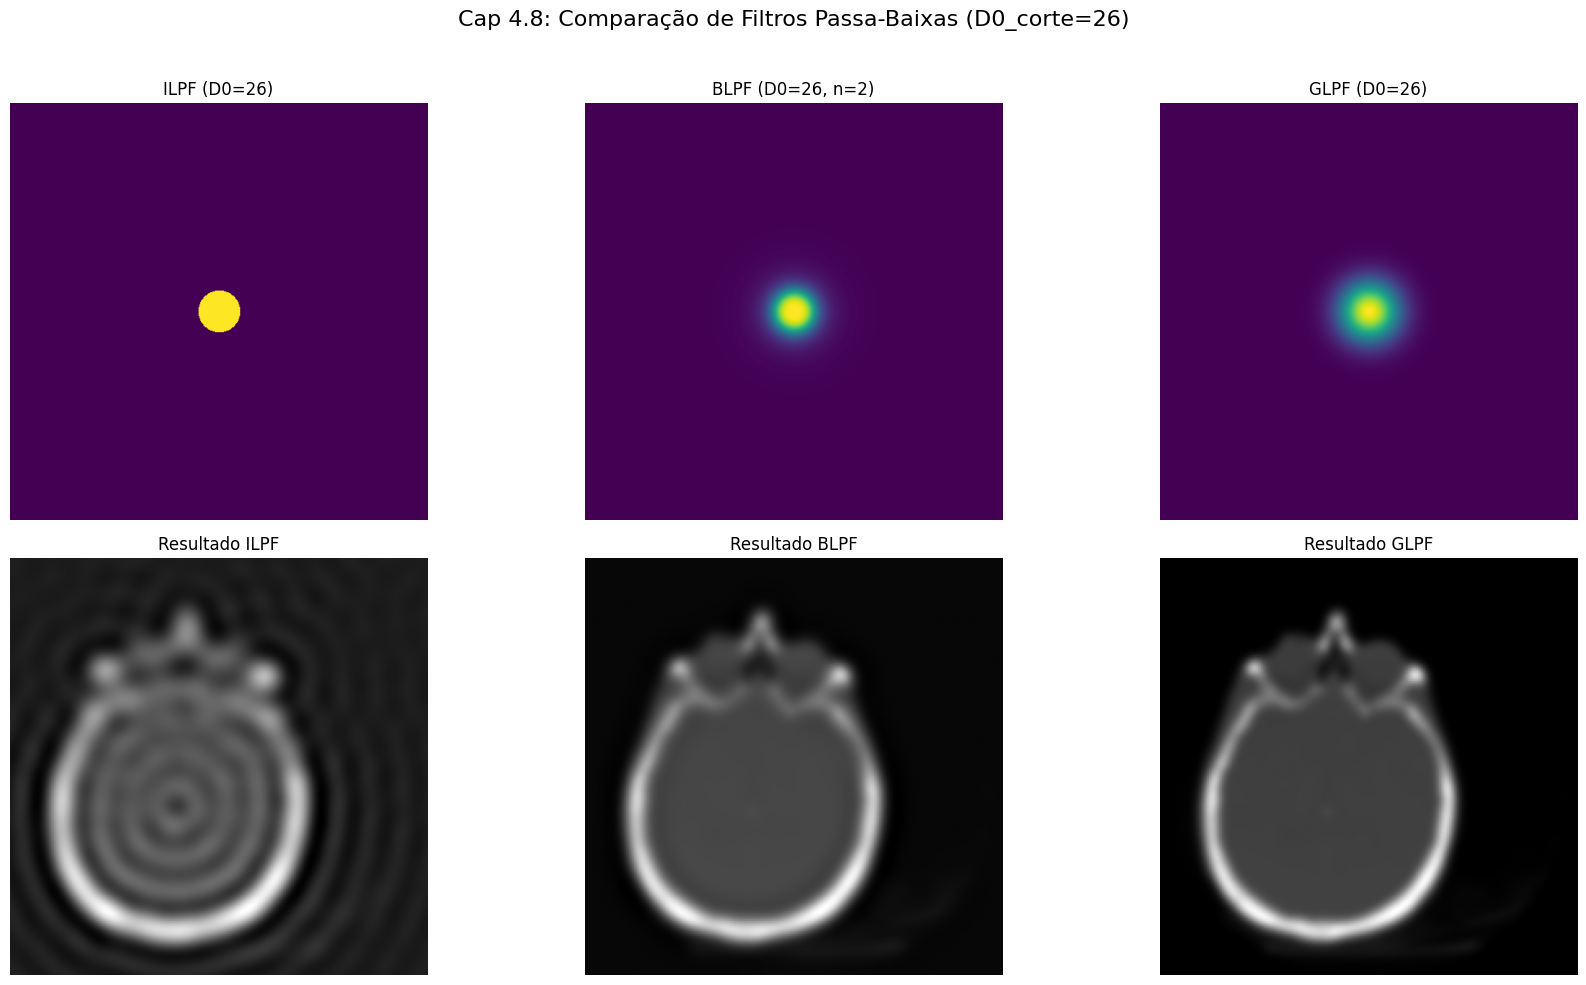

In [ ]:
# 4.8 Filtros Passa-Baixas (Lowpass)
# --- Início of the Definição of Variáveis Essenciais for this bloco ---M, N = image_float.shape
P, Q = 2*M, 2*N # dimensions with padding
fp_para_filtragem = np.zeros((P,Q))
fp_para_filtragem[0:M, 0:N] = image_float
F_uv_centralizado_fp = fftshift(fft2(fp_para_filtragem)) # DFT da imagem com padding, centralizada
# Coordenadas of frequency centralizadas (U varia horizontalmente, V verticalmente in the spectrum)# These coordenadas are relativas ao centro (P/2, Q/2) of the spectrum PxQu_coords_filt = np.fft.fftshift(np.fft.fftfreq(P)) * P
v_coords_filt = np.fft.fftshift(np.fft.fftfreq(Q)) * Q
# V_mesh_filt e U_mesh_filt para que D_sq_filt seja (u-P/2)^2 + (v-Q/2)^2# If u_coords_filt and v_coords_filt already represent u-P/2 and v-Q/2:V_mesh_filt, U_mesh_filt = np.meshgrid(v_coords_filt, u_coords_filt) # V (lines), U (colunas) of the grid of frequencyD_sq_filt = U_mesh_filt**2 + V_mesh_filt**2 # Distância quadrada of the origem (centro)
# Frequency of corte comum for comparisonD0_lp_comparacao = P * 0.05 # Ex: 5% of the dimension P (smaller D0 = more borramento)
# Function auxiliar local for IDFT, ifftshift, extraction and reescalonamentodef idft_process_extract_local(G_centralizado, P_img, Q_img, M_orig, N_orig):
    """Aplica ifftshift, ifft2, pega parte real, remove padding e reescala."""
    # Ifftshift desfaz the centralization of G before of the IDFT    img_padded_spatial = ifft2(ifftshift(G_centralizado)).real
    # Extrai the region original MxN of the canto superior esquerdo (or centro, dependendo of the padding)    # For the padding done (image in the canto), the corte is direto:    img_final = img_padded_spatial[0:M_orig, 0:N_orig]
    return exposure.rescale_intensity(img_final, out_range=(0,1))
# --- Fim of the Definição of Variáveis Essenciais ---
# a) Filtro Passa-Baixas Ideal (ILPF)H_ilpf_comp = np.where(D_sq_filt <= D0_lp_comparacao**2, 1.0, 0.0).astype(float)

# b) Filtro Passa-Baixas Butterworth (BLPF)n_ordem_blpf_comp = 2 # Ordem do filtroden_blpf_comp = 1 + (np.sqrt(D_sq_filt) / (D0_lp_comparacao + 1e-6))**(2*n_ordem_blpf_comp)
H_blpf_comp = 1 / den_blpf_comp

# c) Filtro Passa-Baixas Gaussiano (GLPF)H_glpf_comp = np.exp(-D_sq_filt / (2 * (D0_lp_comparacao + 1e-6)**2))


# Aplicar os filtrosG_ilpf_cent_comp = H_ilpf_comp * F_uv_centralizado_fp
G_blpf_cent_comp = H_blpf_comp * F_uv_centralizado_fp
G_glpf_cent_comp = H_glpf_comp * F_uv_centralizado_fp

img_filtrada_ilpf_comp = idft_process_extract_local(G_ilpf_cent_comp, P, Q, M, N)
img_filtrada_blpf_comp = idft_process_extract_local(G_blpf_cent_comp, P, Q, M, N)
img_filtrada_glpf_comp = idft_process_extract_local(G_glpf_cent_comp, P, Q, M, N)

# Visualization 4.8fig, axs = plt.subplots(2, 3, figsize=(18, 10))
# Line 1: Filters H(u, v) - already are centralizados for plotagemaxs[0,0].imshow(H_ilpf_comp, cmap='viridis', vmin=0, vmax=1); axs[0,0].set_title(f'ILPF (D0={D0_lp_comparacao:.0f})')
axs[0,1].imshow(H_blpf_comp, cmap='viridis', vmin=0, vmax=1); axs[0,1].set_title(f'BLPF (D0={D0_lp_comparacao:.0f}, n={n_ordem_blpf_comp})')
axs[0,2].imshow(H_glpf_comp, cmap='viridis', vmin=0, vmax=1); axs[0,2].set_title(f'GLPF (D0={D0_lp_comparacao:.0f})')

# Linha 2: Imagens resultantesaxs[1,0].imshow(img_filtrada_ilpf_comp, cmap='gray'); axs[1,0].set_title('Resultado ILPF')
axs[1,1].imshow(img_filtrada_blpf_comp, cmap='gray'); axs[1,1].set_title('Resultado BLPF')
axs[1,2].imshow(img_filtrada_glpf_comp, cmap='gray'); axs[1,2].set_title('Resultado GLPF')

for ax_row in axs:
    for ax_col in ax_row:
        ax_col.axis('off')
plt.suptitle(f"Cap 4.8: Comparação de Filtros Passa-Baixas (D0_corte={D0_lp_comparacao:.0f})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Line 1 (Filters H(u, v)): * axs[0,0] (ILPF): Shows a círculo sharp of value 1 (branco) in the centro, with raio D0_lp_withpairacao, and value 0 (preto) outside. This is the feature of "corte ideal". * axs[0,1] (BLPF): Shows a círculo with edges more suaves that the ILPF. The transição of 1 for 0 is gradual, controlada by the ordem n_ordem_blpf_withp. A n larger tornairia the edge more abrupta. * axs[0,2] (GLPF): Shows a mancha Gaussiana, with the value maximum 1 in the centro, decaindo suavemente for zero in direction to the edges. Is the filter with the transição more suave.

Line 2 (Images Resultantes): * axs[1,0] (Result ILPF): The image aparece significativamente borrada. Note the presença of airtefatos of "ringing" – patterns ondulatórios or halos next the edges and transições sharp in the image original. That is a consequência direta of the corte abrupto of the filter ILPF in the domain of the frequency. * axs[1,1] (Result BLPF): The image also is borrada, but the efeito of "ringing" is less pronunciado (or ausente, dependendo of the ordem n and of D0) in withpairison with the ILPF. The smoothing is more agradável visualmente. * axs[1,2] (Result GLPF): The image shows the larger grau of smoothing "natural", sem airtefatos of ringing. The edges are borradas, but of form suave.

All the three filters suavizam the image, pois atenuam the altas frequencies. The GLPF produz the result more suave and sem airtefatos. The ILPF is the that more sofre with the ringing. The BLPF oferece a withpromisso between the nitidez of the corte and the quantidade of ringing. The escolha of D_0 (frequency of corte) is crucial: a D_0 smaller causa more borramento, enquanto a D_0 larger preserva more detalhes (and altas frequencies).

4.9 Aguçamento of Images with Filters Passa-Altas Filters passa-altas (HPF) do the oposto of the passa-baixas: atenuam baixas frequencies and realçam/passam altas frequencies, resultando in aguçamento of edges and detalhes. Abordaremos: 1. Construção the pairtir of LPFs: H_HP=1−H_LP. 2. Types Comuns (Gaussiano HPF): Demonstraremos the GHPF. 3. Laplaciano in the Domain of the Frequency: A form of filter passa-altas that enhances edges. 4. Unshairp Masking and Highboost Filtering: Técnicas that subtraem a versão borrada of the image original for to obtain a "mask of detalhes", that is then adicionada of volta à original (with a peso k) for aguçamento. 5. Filtragem Homomórfica: A technique more avançada that opera in the logairitmo of the image for sepairair and processair diferencialmente the withponents of illumination (baixa frequency) and reflectância (alta frequency).

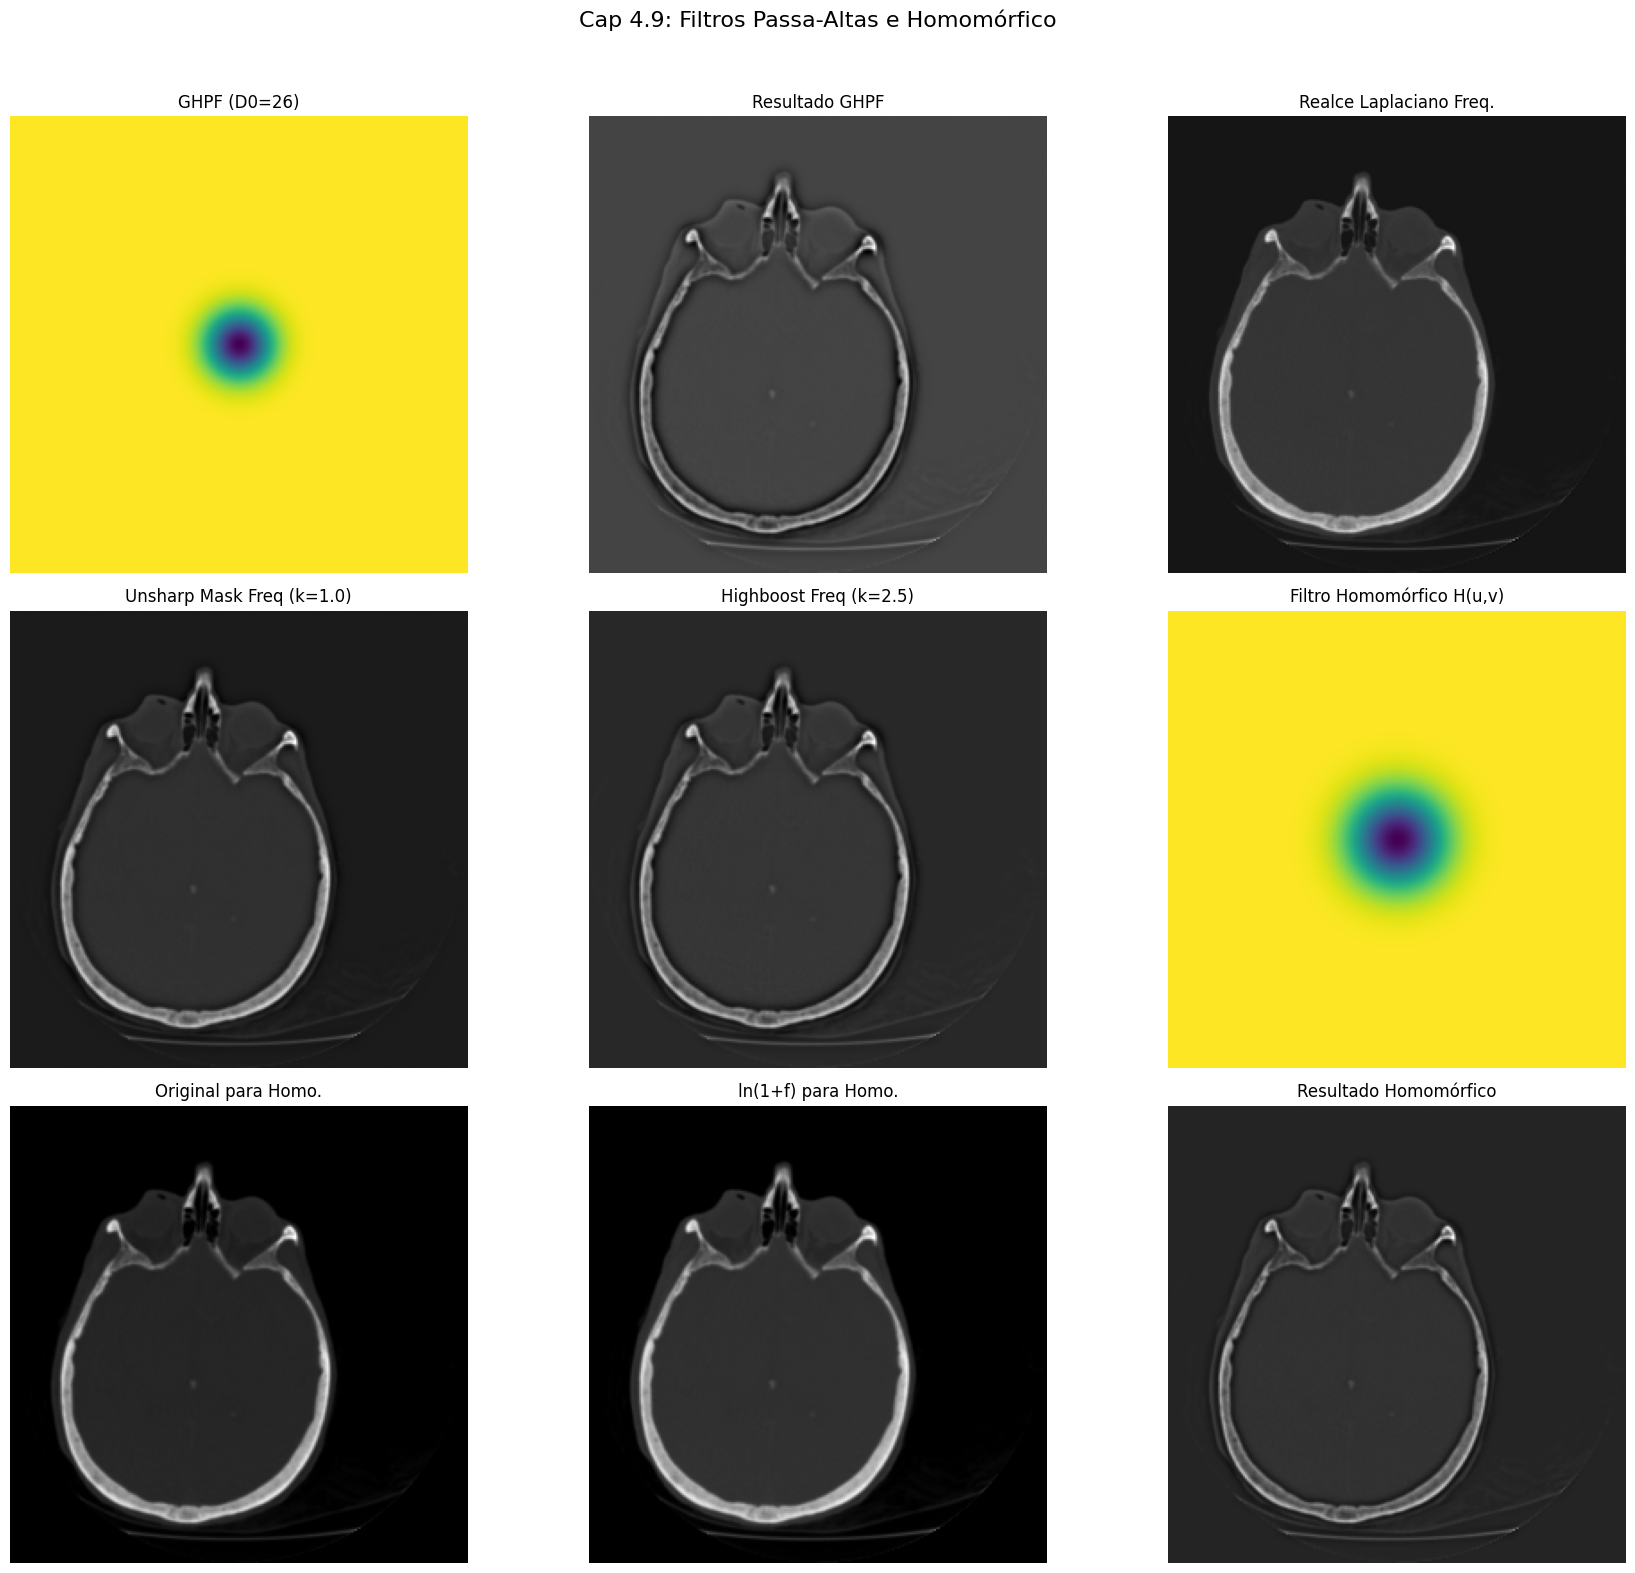

In [ ]:
# 4.9 Filters Passa-Altas (Highpass) and Filtragem Homomórfica
# --- Início of the Definição of Variáveis Essenciais for this bloco ---M, N = image_float.shape
P, Q = 2*M, 2*N # dimensions with padding
fp_para_filtragem_4_9 = np.zeros((P,Q))
fp_para_filtragem_4_9[0:M, 0:N] = image_float
F_uv_centralizado_fp_4_9 = fftshift(fft2(fp_para_filtragem_4_9))

u_coords_filt_4_9 = np.fft.fftshift(np.fft.fftfreq(P)) * P
v_coords_filt_4_9 = np.fft.fftshift(np.fft.fftfreq(Q)) * Q
V_mesh_filt_4_9, U_mesh_filt_4_9 = np.meshgrid(v_coords_filt_4_9, u_coords_filt_4_9)
D_sq_filt_4_9 = U_mesh_filt_4_9**2 + V_mesh_filt_4_9**2

# Frequency of corte for HPFsD0_hpf_comp_4_9 = P * 0.05

# Function auxiliar localdef idft_process_extract_local_4_9(G_centralizado, P_img, Q_img, M_orig, N_orig):
    img_padded_spatial = ifft2(ifftshift(G_centralizado)).real
    img_final = img_padded_spatial[0:M_orig, 0:N_orig]
    return exposure.rescale_intensity(img_final, out_range=(0,1))
# --- Fim of the Definição of Variáveis Essenciais ---
# The) Construção of Filters Passa-Altas (HPF) from LPFs: HPF = 1 - LPF# Usaremos o GLPF como base para o GHPFH_glpf_base_para_hp_4_9 = np.exp(-D_sq_filt_4_9 / (2 * (D0_hpf_comp_4_9 + 1e-6)**2))
H_ghpf_comp_4_9 = 1 - H_glpf_base_para_hp_4_9

# Aplicar filtro GHPFG_ghpf_cent_comp_4_9 = H_ghpf_comp_4_9 * F_uv_centralizado_fp_4_9
img_filtrada_ghpf_comp_4_9 = idft_process_extract_local_4_9(G_ghpf_cent_comp_4_9, P, Q, M, N)


# B) Laplaciano in the Domain of the FrequencyH_laplacian_freq_kernel_4_9 = -D_sq_filt_4_9 # Proporcional a -D^2(u,v)G_lap_img_freq_4_9 = H_laplacian_freq_kernel_4_9 * F_uv_centralizado_fp_4_9
img_laplaciano_espacial_via_freq_4_9 = idft_process_extract_local_4_9(G_lap_img_freq_4_9, P, Q, M, N)

# Realce Laplaciano: f_realcada = f_original - c * L(f)# The result of img_laplaciano_espacial_via_freq is the Laplaciano of the image,# But its escala can not to be ideal for subtração direta. Let us normalizá-lo a little# antes de subtrair, ou usar um fator 'c'.# A 'c' small can to be necessary if the Laplaciano tiver magnitudes large.c_laplace_factor = 0.2 # Fator de escala para o Laplacianoimg_realce_lap_freq_final_4_9 = image_float - c_laplace_factor * (img_laplaciano_espacial_via_freq_4_9 - np.mean(img_laplaciano_espacial_via_freq_4_9))
img_realce_lap_freq_final_4_9 = exposure.rescale_intensity(img_realce_lap_freq_final_4_9, out_range=(0,1))


# C) Unsharp Masking and Highboost Filtering in the Domain of the Frequencyk_unsharp_val_4_9 = 1.0
H_filt_unsharp_freq_4_9 = 1.0 + k_unsharp_val_4_9 * H_ghpf_comp_4_9 # Usa o GHPFG_unsharp_cent_freq_4_9 = H_filt_unsharp_freq_4_9 * F_uv_centralizado_fp_4_9
img_unsharp_resultado_freq_final_4_9 = idft_process_extract_local_4_9(G_unsharp_cent_freq_4_9, P, Q, M, N)

k_highboost_val_4_9 = 2.5
H_filt_highboost_freq_4_9 = 1.0 + k_highboost_val_4_9 * H_ghpf_comp_4_9
G_highboost_cent_freq_4_9 = H_filt_highboost_freq_4_9 * F_uv_centralizado_fp_4_9
img_highboost_resultado_freq_final_4_9 = idft_process_extract_local_4_9(G_highboost_cent_freq_4_9, P, Q, M, N)

# D) Filtragem Homomórficaimg_log_para_homomorfico_4_9 = np.log1p(image_float + 1e-6) # Adicionar epsilon para evitar log(0) se image_float for 0
fp_log_homo_pad_4_9 = np.zeros((P,Q))
fp_log_homo_pad_4_9[0:M, 0:N] = img_log_para_homomorfico_4_9
Fp_log_homo_centralizada_4_9 = fftshift(fft2(fp_log_homo_pad_4_9))

gamma_L_param_4_9 = 0.55  # Atenua baixas frequencies (illumination)gamma_H_param_4_9 = 2.0  # Amplifica altas frequencies (reflectância)c_const_homo_param_4_9 = 1.0 # Controle of the inclinaçãoD0_corte_homo_param_4_9 = P * 0.1 # Frequency of corte
H_filtro_homomorfico_final_4_9 = (gamma_H_param_4_9 - gamma_L_param_4_9) * \
                                 (1 - np.exp(-c_const_homo_param_4_9 * (D_sq_filt_4_9 / (D0_corte_homo_param_4_9**2 + 1e-6)))) + \
                                 gamma_L_param_4_9

G_homo_centralizada_4_9 = H_filtro_homomorfico_final_4_9 * Fp_log_homo_centralizada_4_9
img_s_homo_processada_4_9 = idft_process_extract_local_4_9(G_homo_centralizada_4_9, P, Q, M, N)
img_resultado_homomorfico_final_4_9 = np.expm1(img_s_homo_processada_4_9)
img_resultado_homomorfico_final_4_9 = exposure.rescale_intensity(img_resultado_homomorfico_final_4_9, out_range=(0,1))

# Visualization 4.9fig, axs = plt.subplots(3, 3, figsize=(18, 16))
axs[0,0].imshow(H_ghpf_comp_4_9, cmap='viridis'); axs[0,0].set_title(f'GHPF (D0={D0_hpf_comp_4_9:.0f})'); axs[0,0].axis('off')
axs[0,1].imshow(img_filtrada_ghpf_comp_4_9, cmap='gray'); axs[0,1].set_title('Resultado GHPF'); axs[0,1].axis('off')
axs[0,2].imshow(img_realce_lap_freq_final_4_9, cmap='gray'); axs[0,2].set_title('Realce Laplaciano Freq.'); axs[0,2].axis('off')

axs[1,0].imshow(img_unsharp_resultado_freq_final_4_9, cmap='gray'); axs[1,0].set_title(f'Unsharp Mask Freq (k={k_unsharp_val_4_9})'); axs[1,0].axis('off')
axs[1,1].imshow(img_highboost_resultado_freq_final_4_9, cmap='gray'); axs[1,1].set_title(f'Highboost Freq (k={k_highboost_val_4_9})'); axs[1,1].axis('off')
axs[1,2].imshow(H_filtro_homomorfico_final_4_9, cmap='viridis'); axs[1,2].set_title('Filtro Homomórfico H(u,v)'); axs[1,2].axis('off')

axs[2,0].imshow(image_float, cmap='gray'); axs[2,0].set_title('Original para Homo.'); axs[2,0].axis('off')
axs[2,1].imshow(img_log_para_homomorfico_4_9, cmap='gray'); axs[2,1].set_title('ln(1+f) para Homo.'); axs[2,1].axis('off')
axs[2,2].imshow(img_resultado_homomorfico_final_4_9, cmap='gray'); axs[2,2].set_title('Resultado Homomórfico'); axs[2,2].axis('off')

plt.suptitle(f"Cap 4.9: Filtros Passa-Altas e Homomórfico", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Line 1 (GHPF and Laplaciano): * axs[0,0] (GHPF H(u, v)): Shows the filter Gaussiano Passa-Altas. Is escuro in the centro (atenua baixas frequencies) and clareia in direction to the edges (passa/enhances altas frequencies). * axs[0,1] (Result GHPF): The image resultante has their edges and detalhes finos enhanced. Áreas suaves can parecer more escuras, pois the withponent DC and the baixas frequencies were atenuadas. * axs[0,2] (Realce Laplaciano Freq.): The image exibe a aguçamento of the edges. The Laplaciano enhances changes rápidas of intensidade. The result specific (how escura or claira fica the image) depende of as the Laplaciano (that can to have values negativos) is withbinado with the image original and reescalonado. Line 2 (Unshairp Masking, Highboost, Filter Homomórfico H(u, v)): * axs[1,0] (Unshairp Mask Freq): The edges and detalhes are more sharp that in the original. The brilho geral and the withponents of baixa frequency are more bem preservados in withpairison with a HPF puro, devido to the termo "1" in the function of transferência of the filter (H=1+k cdotH_HP). * axs[1,1] (Highboost Freq): The aguçamento is still more pronunciado that in the Unshairp Masking (devido the k1). The edges and detalhes finos ficam bem destacados. * axs[1,2] (Filter Homomórfico H(u, v)): Shows the form of the filter homomórfico. Ele should to have a ganho baixo (escuro) for baixas frequencies (centro) and a ganho alto (clairo) for altas frequencies (periferia), with a transição suave. Line 3 (Filtragem Homomórfica - Passos): * axs[2,0] (Original for Homo.): Image of input. * axs[2,1] (ln(1+f) for Homo.): The image after the transformação logairítmica. The faixa dinâmica is withprimida, and the withponents of illumination and reflectância, that were multiplicativas, tornam-if aditivas. * axs[2,2] (Result Homomórfico): The image final. Idealmente, the illumination not uniforme was corrigida (withponents of baixa frequency atenuados), and the detalhes (withponents of alta frequency of the reflectância) were enhanced. The result should to be a image with better contraste local and faixa dinâmica more equilibrada in termos of illumination. The pairameters gamma_L, gamma_H, c, D0 of the filter homomórfico precisam to be ajustados for the image specific for to obtain bons results.